# Double integrals understood

This notebook is meant to help us understand double integals. It is inspired by Cristphors work from:
>https://www.youtube.com/watch?v=C-yfMjxxsz0&t=1496s

Conseptually a double integral is just the volume between a surface and a plane.
It  has positive and negative values and they represent the direction of the volume quantity relative to the plane norm. At first we need to start with simple integrals. Given a function {f(x):R -> R} we declare the integral on a close interval $[a,b]$ as the areea between the funciton and the x-Axis of the xOy plane. 
## Example
Given the function {f(x):R->R} 
$\begin{equation} f(x)=(x^2+2*x+5) \end{equation}$ and the interval 
$\begin{equation} [a,b]=[-1,3] \end{equation}$ we can define
$\begin{equation}
\int_{a}^{b} f(x) \,dx = \int_{a}^{b} (x^2+2*x+5) \,dx
\end{equation}$


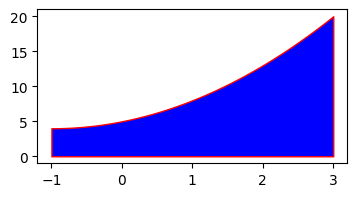

In [1]:

import numpy as np 
import matplotlib.pyplot as plt
from decimal import Decimal

def f(x:Decimal):
  return pow(x,2)+2*x+5

xvals = np.linspace(-1,3,100) #100 points from -1 to 3 in ndarray
yvals = list(map(f, xvals)) #evaluate f for each point in xvals 

plt.rcParams["figure.figsize"] = (4,2)
fig, ax1 = plt.subplots(1, 1)
collection = ax1.fill_between(xvals,yvals,0)
collection.set_facecolor('BLUE')
collection.set_edgecolor('RED')

Here we can consider a point $X$ and a a vecinity of this point $\Delta X$. Using this conotation we can define the arrea underneath the function as a sum of all the rectangles with a base equal to the interval $\Delta X$ and the size equal to $f(x)$, centered aorund the points $X \in [-1,3]$ with they're vecinities $\Delta X$. Thus we can define the $\int_{a}^{b} f(x) \,dx=\sum_{a}^{b} {f(x)*{\Delta X}}$.

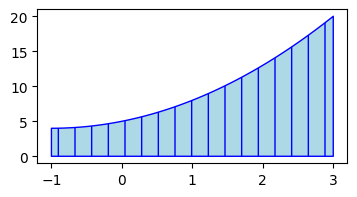

In [2]:
plt.rcParams["figure.figsize"] = (4,2)
fig, ax1 = plt.subplots(1, 1)
collection = ax1.fill_between(xvals,yvals,0)
collection.set_facecolor('LIGHTBLUE')
collection.set_edgecolor('BLUE')
collection.set_hatch('|')

We can take a small saple for our example and consider the $\Delta X = 0.05$. This we will see how accurate this approximation is by comparing it's value to the algebraically calculated integral.\
$\int_{-1}^{3} x^2+2*x+5 \,dx = \int_{-1}^{3} x^2 \,dx + \int_{-1}^{3} 2*x \,dx + \int_{-1}^{3} 5 \,dx$.\
Now by solving each integral by itself we get:\
$\int_{-1}^{3}x^2+2*x+5\,dx=\left.{\cfrac{x^3}{3}}\right|_{\;-1}^{\;3}+\left.{x^2}\right|_{\;-1}^{\;3}+\left.{5*x}\right|_{\;-1}^{\;3} $

In [3]:
def intF(x):
    return pow(x,3)/3+pow(x,2)+5*x
print(intF(3)-intF(-1))
print(112/3)

37.333333333333336
37.333333333333336



$\int_{-1}^{3}x^2+2*x+5\,dx = (9-1/3) + (9 - 1) +( 15 - 5 ) = \cfrac{80}{3}$



If we are going to sue the previously defined array contianing 100 values between -1 and 3 the result would be pretty of.

In [4]:
xvals = np.linspace(-1,3,100) #100 points from -1 to 3 in ndarray
yvals = list(map(f, xvals)) #evaluate f for each point in xvals 
areea = 0
DeltaX=(xvals.item(len(xvals)-1)-xvals.item(0))/len(xvals)
print(f"DeltaX is :{DeltaX}")
for y in yvals:
    areea = areea + abs(DeltaX * y)
print(f"The areea is :{areea}")

DeltaX is :0.04
The areea is :37.44107744107744


If we are going to increase the number of Points thus decreasing the value of Delta our approxamtion will get closer. It can be proven that when:\
$\lim_{\Delta X \to 0} $ the sum of $\sum_{a}^{b} {f(x)*{\Delta X}}$ tends towards $\int_{a}^{b} f(x) \,dx$

In [5]:
xvals = np.linspace(-1,3,1000) #1000 points from -1 to 3 in ndarray
yvals = list(map(f, xvals)) #evaluate f for each point in xvals 
areea = 0
DeltaX=(xvals.item(len(xvals)-1)-xvals.item(0))/len(xvals)
print(f"DeltaX is :{DeltaX}")
for y in yvals:
    areea = areea + abs(DeltaX * y)
print(f"The areea is :{areea}")

DeltaX is :0.004
The areea is :37.34401067734402


The error remains pretty high and it can be decreased by a huge margin if we use Trapezoids insdead of rectangles. A few examples would be [Simpon's rule](https://en.wikipedia.org/wiki/Simpson%27s_rule) and [Trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule). 

In [6]:
import numpy as np
from scipy.integrate import simpson
from numpy import trapz

areea = 0
DeltaX=(xvals.item(len(xvals)-1)-xvals.item(0))/len(xvals)

# Compute the area using the composite trapezoidal rule.
area = trapz(yvals, dx=DeltaX)
print("Trapezoidal area =", area)

# Compute the area using the composite Simpson's rule.
area = simpson(yvals, dx=DeltaX)
print("Simpson area =", area)

Trapezoidal area = 37.29601067734401
Simpson area = 37.296000010688026


# Double integrals
They can be defined as the volume between a surface and a plane, usually the xOy plane. This plane si defined by the variables that we use as derivatives ($dx,dy$).

In [7]:
import k3d
from k3d.colormaps import matplotlib_color_maps

def f(x, y):
    return (np.sqrt(x ** 2 + y**2))

plot = k3d.plot()

x = np.linspace(-3, 3, 60,dtype=np.float32)
y = np.linspace(-3, 3, 60,dtype=np.float32)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

functionShape = k3d.surface(Z,
                          color_map=matplotlib_color_maps.Coolwarm_r,
                          attribute=Z, color_range=[-1, 0.5],
                          wireframe=True,
                          xmin=x[0], xmax=x[len(x)-1],
                          ymin=y[0], ymax=y[len(y)-1])
plane = k3d.surface(Z*0,
                          color=0x006394,
                          wireframe=True,
                          xmin=x[0], xmax=x[len(x)-1],
                          ymin=y[0], ymax=y[len(y)-1])

plot+=functionShape
plot+=plane
plot.height = 300
plot.display()

Output()

# Example
We will randomly choose the function ${f:R^2->R, f(x,y) = {\sqrt{x^2+y^2}}}$ and we will try to calculate the volume underneath the inner dome. First we need to define the areea $A$ such that it sits underneath the dome: $\{A = (x,y) \in R^2 | x^2+y^2 <=1\}$. \
Starting by this definition we can draw the volume we are really interested in:


In [8]:
plot = k3d.plot()
x=[]
y=[]
for i in np.arange(-1,1,0.05):
    for j in np.arange(-1,1,0.05):
        if i ** 2 + j ** 2<=1.0:
            x.append(np.float32(i))
            y.append(np.float32(j))
x = np.array(x)
y = np.array(y)
z = f(x, y)

functionShape = [np.array([x[i],y[i],z[i]],dtype=np.float32) for i in range(0,len(x))]
functionShapePoints = k3d.points(functionShape,point_size=0.1)

plot+=functionShapePoints
plot+=plane
plot.height = 300
plot.display()


Output()

Now we want to calculate:\
$\int_{A}^{ } f(x,y) dxdy$\
But we know that A can be defined as:
$\{A = (x,y) \in R^2 | x^2+y^2 <=1\}$ thus :\
$\int_{A}^{ } f(x,y) dxdy=\int_{-1}^{1}\int_{-1}^{1} f(x,y) dxdy=\int_{-1}^{1}\int_{-1}^{1} {\sqrt{x^2+y^2}} dxdy$
Here we can become creative with this volume and we can calulate it as the volume of the cylinder minus the volume of the cone.
Volume of the cylinder is:\
$V_{cylinder}=2*pi*r^{2}*h$
Here we know that r = 1 , from the deifinition of A and form the image, or first derivative if you feel cocky, we canc onclude that the height of our cylinder woulb be on the edges of the circle, where $x^{2}+y^{2} = 1$ thus $h=\sqrt{1}$\
Synce the volkume of the cone is just $\cfrac{1}{3}$ the volume of the cylinder we can conclude the double integral we are looking for is $\cfrac{2}{3}$ of the volume of the cylinder.


In [9]:
import math
radius = 1
height = 1
Volume_cylinder = 2 * math.pi * radius **2 * height
Integral = 2 / 3 * Volume_cylinder
print(f"The volume under the graph would be around {Integral}")

The volume under the graph would be around 4.1887902047863905


# Polar coordinates

The deifnition of a double integral also holds for polar coordinates.
## Definition of polar coordinates

Polar coordinates are coordinates that describe the position of points relative to the center of the system by using only radius $R$ and a rotation angles $\theta$.

### Polar in 2d

Given a plane xOy each point inside the plane using Cartisian coordinates can be defined as X = {(x,y) | $ \vec{(x,0)}+{\vec{(0,y)} = \vec{X} =(x,y) } $}

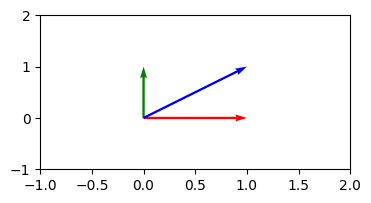

In [34]:
soa = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 1, 1]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1,color = ['r','g','b'])
ax.set_xlim([-1, 2])
ax.set_ylim([-1, 2])
plt.draw()
plt.show()

Describing the same point in polar coordinates would be an issue of finding a radius and an angle describing the rotation from the x axis thus we can define X = {(R,$\theta$) | $|X| = R$ and $\measuredangle{\vec{X},\vec{Ox}}=\theta$}

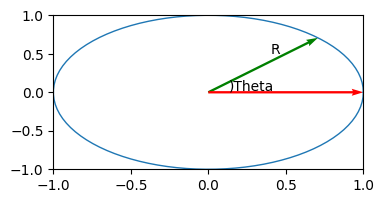

In [46]:
soa = np.array([[0, 0, math.sqrt(2)/2, math.sqrt(2)/2],[0,0,1,0]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.text(0.4,0.5,"R")
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1,color=['g','r'])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
t=np.linspace(0,2*math.pi,100,dtype=np.float32)
ax.plot(np.cos(t), np.sin(t), linewidth=1)
ax.text(0.13,0.02,")Theta")
plt.draw()
plt.show()